# **GYM MEMBERS DATA EXPLORATION AND CALORIES BURNED PREDICTION**

# **INTRODUCTION**

Fitness has become a cornerstone of modern health and well-being, continually evolving alongside the growing focus on personalized routines and tailored wellness goals. This project explores how gym members engage with fitness activities over time by analyzing three key dimensions:

1. **Workout Preferences by Age Group:**
   Analyzing the workout types favored by different age groups to uncover distinct trends and preferences.

2. **Calorie Burn Efficiency by Workout Type:**
   Assessing the effectiveness of various workout routines in burning calories across diverse demographic segments.

3. **Demographic Progression in Fitness:**
   Investigating how experience levels and overall fitness progression influence workout choices and outcomes, including metrics such as BMI and intensity scores.

The analysis leverages the **Gym Members Exercise Dataset**, which provides a comprehensive overview of gym members' exercise routines, physical characteristics, and key fitness metrics.

# **I. DATA EXPLORATION**

First, let's mport necessary libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Load the data set and inspect its structure to understand available features.

In [3]:
df = pd.read_csv('/content/drive/MyDrive/Python/gym_members_exercise_tracking.csv')
df.head()

,Age,Gender,Weight (kg),Height (m),Max_BPM,Avg_BPM,Resting_BPM,Session_Duration (hours),Calories_Burned,Workout_Type,Fat_Percentage,Water_Intake (liters),Workout_Frequency (days/week),Experience_Level,BMI
0,56,Male,88.3,1.71,180,157,60,1.69,1313.0,Yoga,12.6,3.5,4,3,30.20
1,46,Female,74.9,1.53,179,151,66,1.30,883.0,HIIT,33.9,2.1,4,2,32.00
2,32,Female,68.1,1.66,167,122,54,1.11,677.0,Cardio,33.4,2.3,4,2,24.71
3,25,Male,53.2,1.70,190,164,56,0.59,532.0,Strength,28.8,2.1,3,1,18.41
4,38,Male,46.1,1.79,188,158,68,0.64,556.0,Strength,29.2,2.8,3,1,14.39


Let's have a look at the dataset information

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 973 entries, 0 to 972
Data columns (total 15 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Age                            973 non-null    int64  
 1   Gender                         973 non-null    object 
 2   Weight (kg)                    973 non-null    float64
 3   Height (m)                     973 non-null    float64
 4   Max_BPM                        973 non-null    int64  
 5   Avg_BPM                        973 non-null    int64  
 6   Resting_BPM                    973 non-null    int64  
 7   Session_Duration (hours)       973 non-null    float64
 8   Calories_Burned                973 non-null    float64
 9   Workout_Type                   973 non-null    object 
 10  Fat_Percentage                 973 non-null    float64
 11  Water_Intake (liters)          973 non-null    float64
 12  Workout_Frequency (days/week)  973 non-null    int

This dataset contains 973 rows and 15 columns, including both categorical and numerical variables. Notably, there are no missing values, as the non-null counts for all columns match the total number of entries (973).

We categorize the columns into `categorical` and `numerical` groups to make it easier testing.

In [5]:
#List of categorical variables
categorical = [i for i in df.columns if df[i].dtypes == 'O']
# List of numerical variables
numerical = [i for i in df.columns if i not in categorical]
print('categorical:', categorical, '\n', 'numerical: ', numerical)

categorical: ['Gender', 'Workout_Type'] 
 numerical:  ['Age', 'Weight (kg)', 'Height (m)', 'Max_BPM', 'Avg_BPM', 'Resting_BPM', 'Session_Duration (hours)', 'Calories_Burned', 'Fat_Percentage', 'Water_Intake (liters)', 'Workout_Frequency (days/week)', 'Experience_Level', 'BMI']


Let's check the number of null values in each variable

In [6]:
#Check for missing values
df[numerical].isnull().sum()

,0
Age,0
Weight (kg),0
Height (m),0
Max_BPM,0
Avg_BPM,0
Resting_BPM,0
Session_Duration (hours),0
Calories_Burned,0
Fat_Percentage,0
Water_Intake (liters),0


In [7]:
#Check for duplicates
df.duplicated().sum()

np.int64(0)

In [8]:
#Some descriptive statistics for numerical variables
df.describe()

,Age,Weight (kg),Height (m),Max_BPM,Avg_BPM,Resting_BPM,Session_Duration (hours),Calories_Burned,Fat_Percentage,Water_Intake (liters),Workout_Frequency (days/week),Experience_Level,BMI
count,973.000000,973.000000,973.00000,973.000000,973.000000,973.000000,973.000000,973.000000,973.000000,973.000000,973.000000,973.000000,973.000000
mean,38.683453,73.854676,1.72258,179.883864,143.766701,62.223022,1.256423,905.422405,24.976773,2.626619,3.321686,1.809866,24.912127
std,12.180928,21.207500,0.12772,11.525686,14.345101,7.327060,0.343033,272.641516,6.259419,0.600172,0.913047,0.739693,6.660879
min,18.000000,40.000000,1.50000,160.000000,120.000000,50.000000,0.500000,303.000000,10.000000,1.500000,2.000000,1.000000,12.320000
25%,28.000000,58.100000,1.62000,170.000000,131.000000,56.000000,1.040000,720.000000,21.300000,2.200000,3.000000,1.000000,20.110000
50%,40.000000,70.000000,1.71000,180.000000,143.000000,62.000000,1.260000,893.000000,26.200000,2.600000,3.000000,2.000000,24.160000
75%,49.000000,86.000000,1.80000,190.000000,156.000000,68.000000,1.460000,1076.000000,29.300000,3.100000,4.000000,2.000000,28.560000
max,59.000000,129.900000,2.00000,199.000000,169.000000,74.000000,2.000000,1783.000000,35.000000,3.700000,5.000000,3.000000,49.840000


In [9]:
#Some descriptive statistics about categorical variables
df[categorical].describe()

,Gender,Workout_Type
count,973,973
unique,2,4
top,Male,Strength
freq,511,258


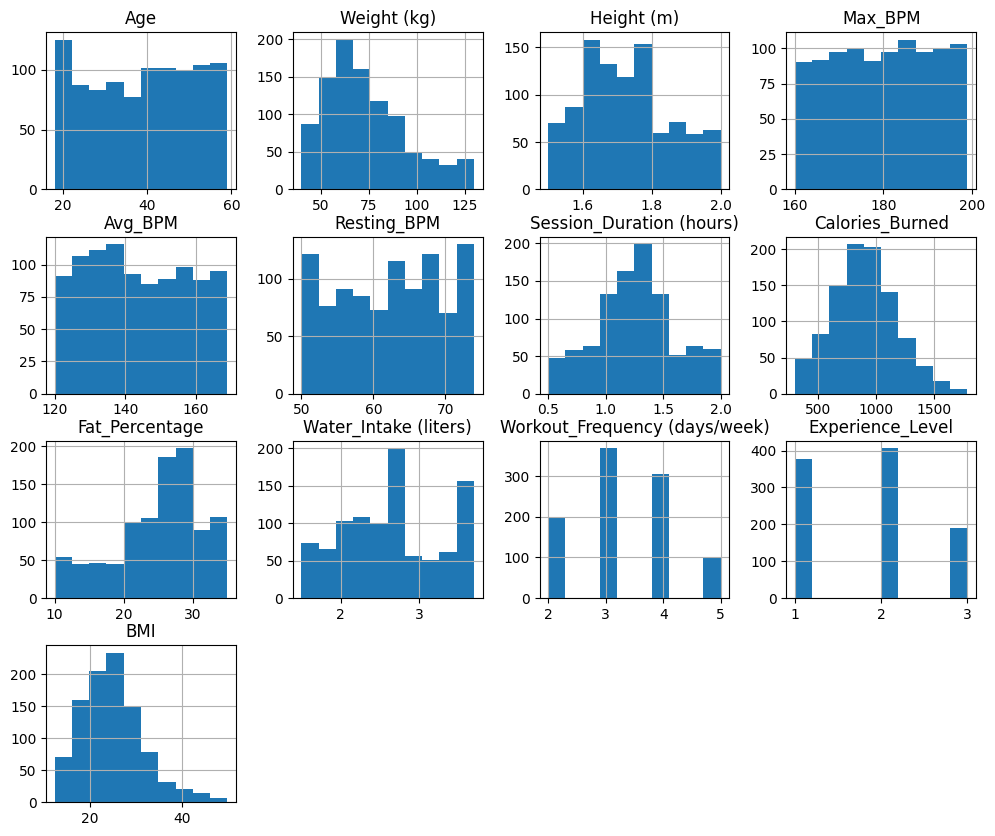

In [10]:
#The distribution of numerical variables
df[numerical].hist(bins=10, figsize = (12,10))
plt.show()

The histograms reveal the following insights:

* Variables like session duration, calories burned, and BMI show patterns resembling normal distributions, with values clustering around average ranges, common in fitness data.
  
* Weight and fat percentage show significant skewness, potentially impacting model performance. Therefore, we need to scaling or transformations to balance their influence before doing modeling.

* Some variables, such as workout frequency, show distinct peaks, as it indicate varying experience levels, ranging from beginner (1) to expert (3).

Let's use boxplots to examine the data range and anomalies.

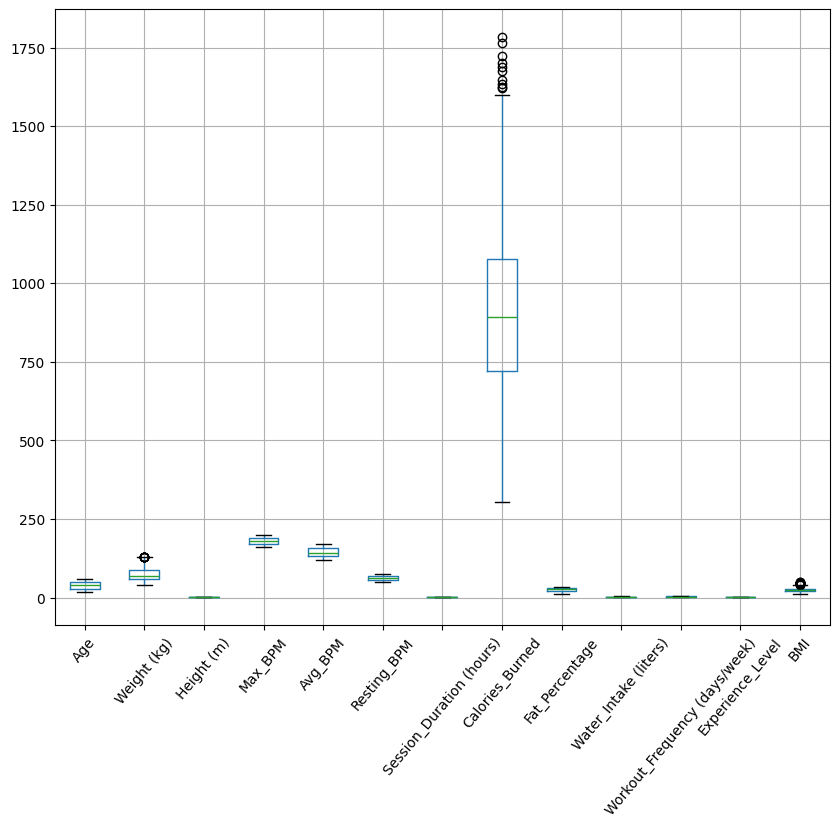

In [11]:
df[numerical].boxplot(figsize=(10,8))
plt.xticks(rotation=50)  # Rotate labels by 45 degrees (or adjust angle as needed)
plt.show()

The box plot shows outliers in Weight, Calories Burned, and BMI. To better understand these anomalies, we will revisit their histograms to examine the distribution and identify the specific ranges in which these outliers fall.

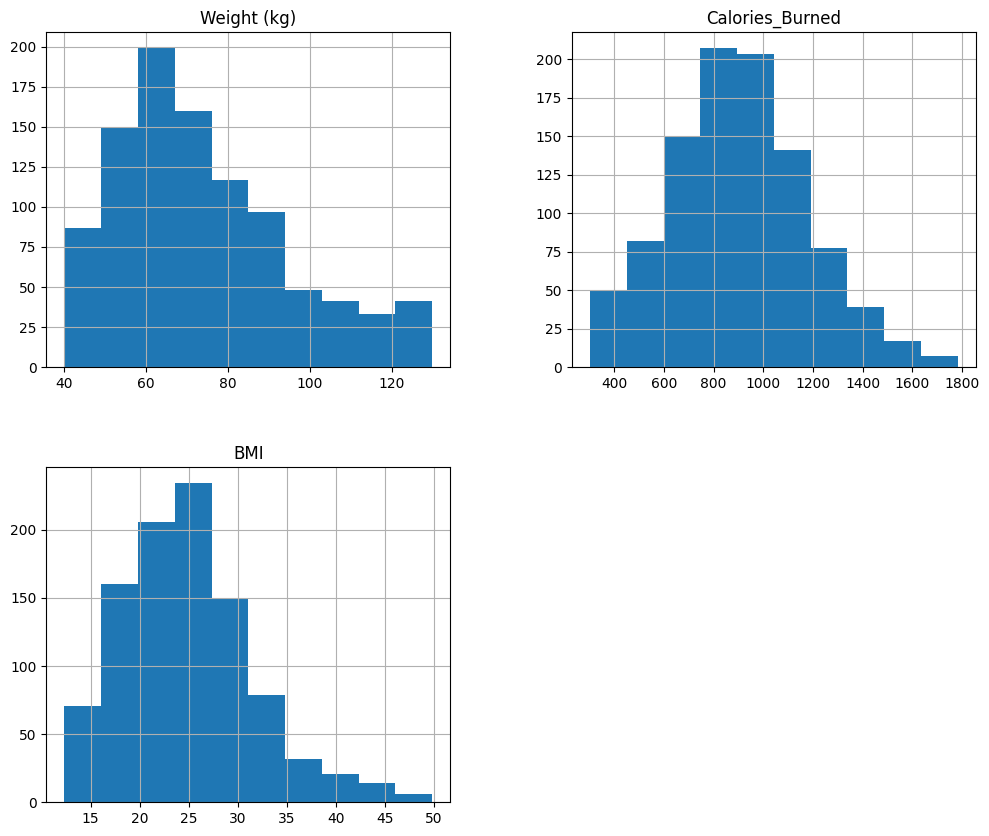

In [12]:
outlier = ['Weight (kg)', 'Calories_Burned', 'BMI']
df[outlier].hist(bins=10, figsize=(12,10))
plt.show()

* By looking at the histogram, it can be seen that the outliers in Weight, Calories_Burned, and BMI fall within acceptable ranges typical for physical fitness data. These values are likely reflective of natural variation in populations with diverse body compositions and activity levels. Therefore, it is reasonable to retain these outliers for descriptive analysis to capture the dataset's real-world diversity.


* However, for modeling purposes, these outliers could introduce bias or affect model accuracy. If modeling is required, it's essential to do steps like removal, transformation, or normalization to manage the impact of these extreme values.

We draw a heatmap to analyze the correlation between variables

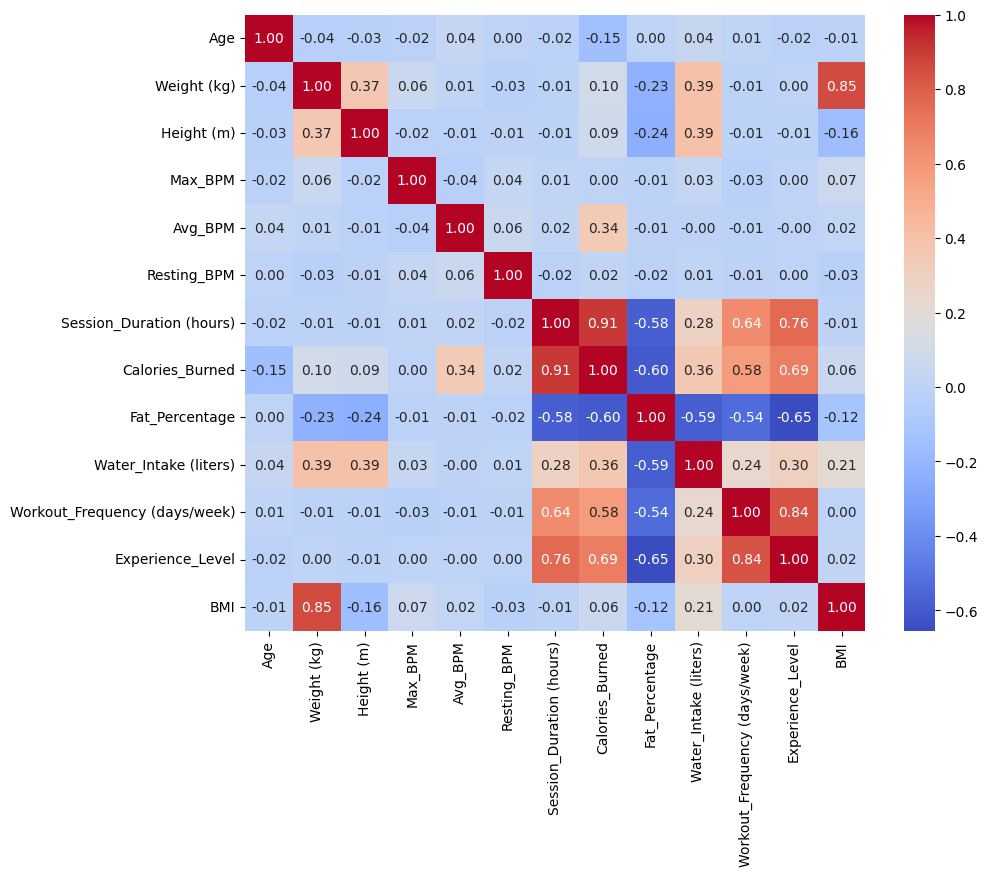

In [13]:
plt.figure(figsize=(10, 8))
sns.heatmap(df[numerical].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.show()

The heatmap show that some variables are strongly correlated, like Weight and BMI,  Workout Frequency and Experienced level, Session Duration and Calories Burned.

# **II. ANALYSIS**

In this part, we aim to determine the factors influencing workout choices and effectiveness by focusing on these following analysis:

* Calorie Burn vs. Workout Type: To determine which workout types are most effective.

* Age and Gender Trends: To uncover which demographics prefer specific workouts.

* Progression Analysis: To track how experience levels impact workout choices and results.

* BMI level:


**1. Workout types:**

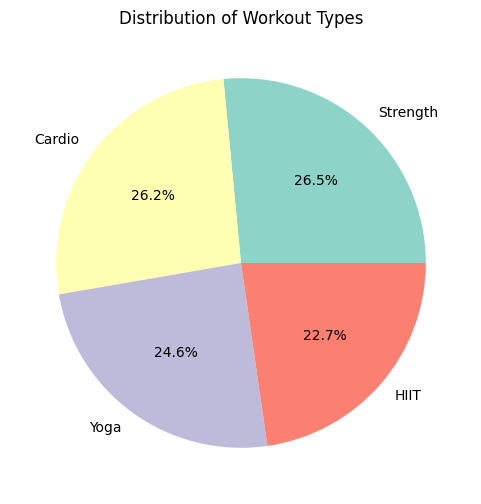

In [14]:
# Calculate the distribution of workout types
workout_counts = df['Workout_Type'].value_counts()

# Plot the pie chart
plt.figure(figsize=(6, 6))
plt.pie(workout_counts, labels=workout_counts.index, autopct='%1.1f%%', colors=sns.color_palette('Set3', len(workout_counts)))
plt.title('Distribution of Workout Types')
plt.show()

The chart shows that the gym member engage in a variety of workout types, with no single one significantly domanting the others. However, Srength and Cardio types are slightly more popular then others.

**2. Age and Gender Trend**

To better uncover key trends, we have divided age into four distinct groups based on their unique habit and characteristics:

* 18-25: This group represents younger individuals, with a likely concentratio of gym members just starting their fitness journey.

* 26-40: Middle-aged individuals who are likely to be actively engaged in fitness routines.

* 41-55: Older individuals,focusing on maintaining health, strength, and fitness levels as they manage lifestyle changes and responsibilities.

* 56+: The older age group, where fitness participation may decrease, but there remains a focus on low-impact activities aimed at maintaining health, mobility, and overall well-being.







In [15]:
bins = [18, 25, 40, 55, 56]

label = ['18-25', '26-40', '41-55', '56+']

df['Age_Group'] = pd.cut(df['Age'], bins=bins, labels=label)

df[['Age', 'Age_Group']].head()

,Age,Age_Group
0,56,56+
1,46,41-55
2,32,26-40
3,25,18-25
4,38,26-40


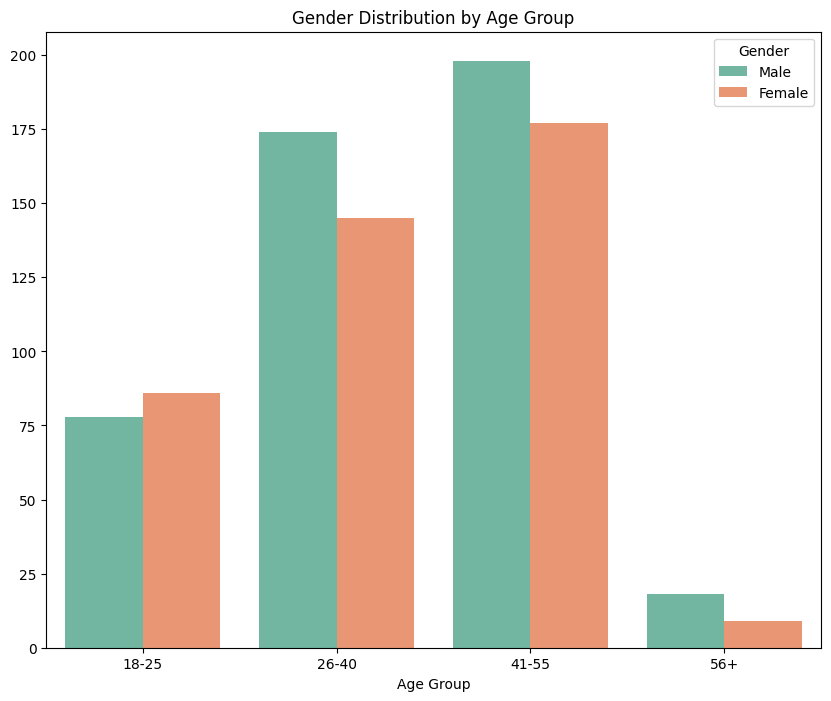

In [16]:
plt.figure(figsize = (10,8))
sns.countplot(x = 'Age_Group', hue = 'Gender', data = df, palette='Set2')
plt.title('Gender Distribution by Age Group')
plt.xlabel('Age Group')
plt.ylabel('')
plt.show()

The graph above indicates several important trends related to age groups and genders:

**Gender trend:**

* For most age groups (26-40, 41-55, and 56+), the number of male participants greater than the number of females.

* In the group of 18-25, females exceed males, suggesting a stronger trend among young women towards gym attendance.

**Age trend:**

* The age group of 41-55 has the highest participation for both gender, indicate that this group potentially prioritizing health maintenance and fitness goals in midlife.

* The participation declines noticeably in the 56+ age group, potentially due to physical limitations or other age-related barriers.

Let's have a look of how age and gender preference in workout types

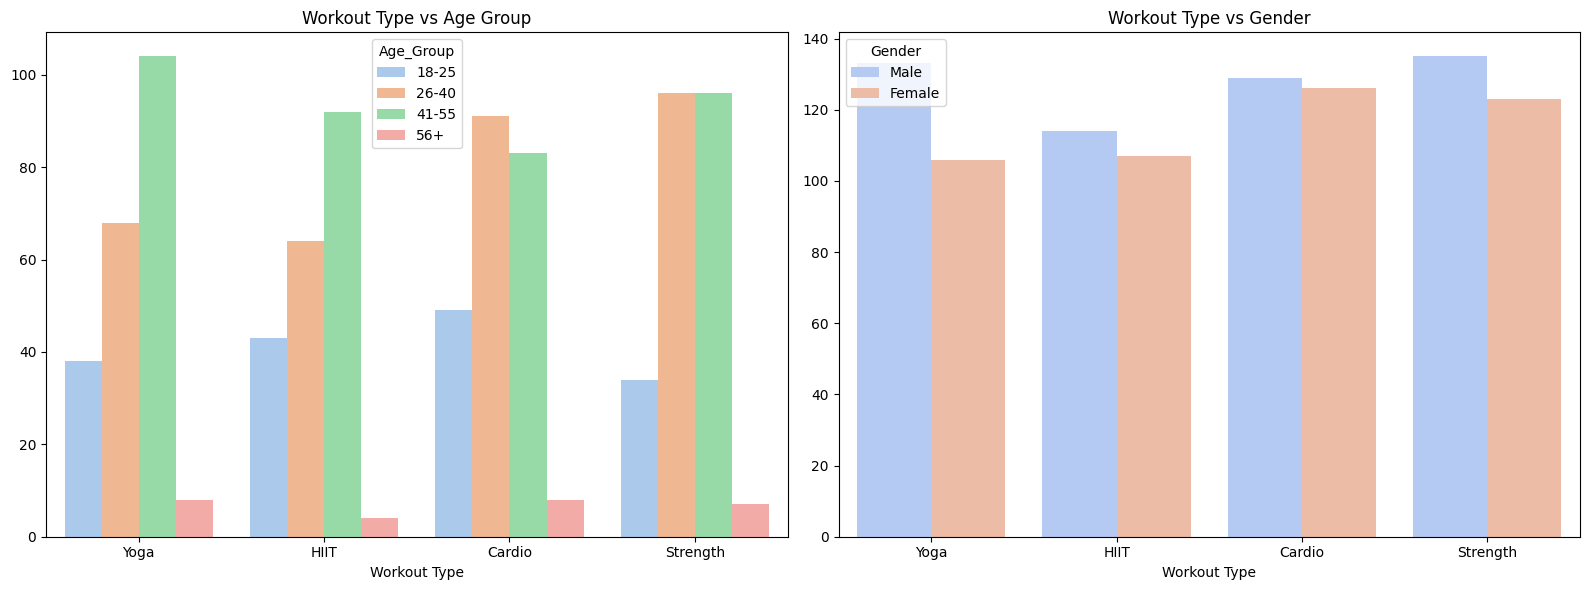

In [17]:
# Create subplots with 1 row and 2 columns
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Plot age vs workout type
sns.countplot(ax=axes[0], x='Workout_Type', hue='Age_Group', data=df, palette='pastel')
axes[0].set_title('Workout Type vs Age Group')
axes[0].set_xlabel('Workout Type')
axes[0].set_ylabel('')

# Plot gender vs workout type
sns.countplot(ax=axes[1], x='Workout_Type', hue='Gender', data=df, palette='coolwarm')
axes[1].set_title('Workout Type vs Gender')
axes[1].set_xlabel('Workout Type')
axes[1].set_ylabel('')

plt.tight_layout()
plt.show()

**Workout types and Age group:**

* 18-25 Age Group participates moderately, especially in HIIT and Cardio, suggesting a focus on intense, calorie-burning workouts. However, participation in Strength Training and Yoga is lower compared to older groups.

* 26-40 Age Group consistent participation in all workout types, with a strong preference for Cardio and Strength Training.

* 41-55 Age group shows the highest participation across all workout types, particularly Yoga and HIIT.

* 56+ Age Group has very low participation across all workout types.

**Workout Type vs Gender:**

* Yoga: Males have higher participation than females.
This challenges common perceptions that Yoga is more popular among women.

* HIIT: Both genders have a relatively balanced participation, indicating its broad appeal regardless of gender.

* Cardio: Cardio sessions show nearly identical participation levels across genders, indicating universal appeal regardless of gender.

* Strength Training: This sessions have a slightly higher participation rate among males compared to females, consistent with traditional preferences for strength workouts among men.

**Overall:**

* The 41-55 age group emerges as the most active demographic, with high participation across all workout types.

* Gender participations are balance but noticeable, with males favoring strength-based and Yoga exercises more than females, while high-intensity and cardio workouts appeal equally to both genders.

**3. Calories Burned**

/tmp/ipython-input-18-1673106108.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Workout_Type', y='Calories_Burned', palette='Set1')


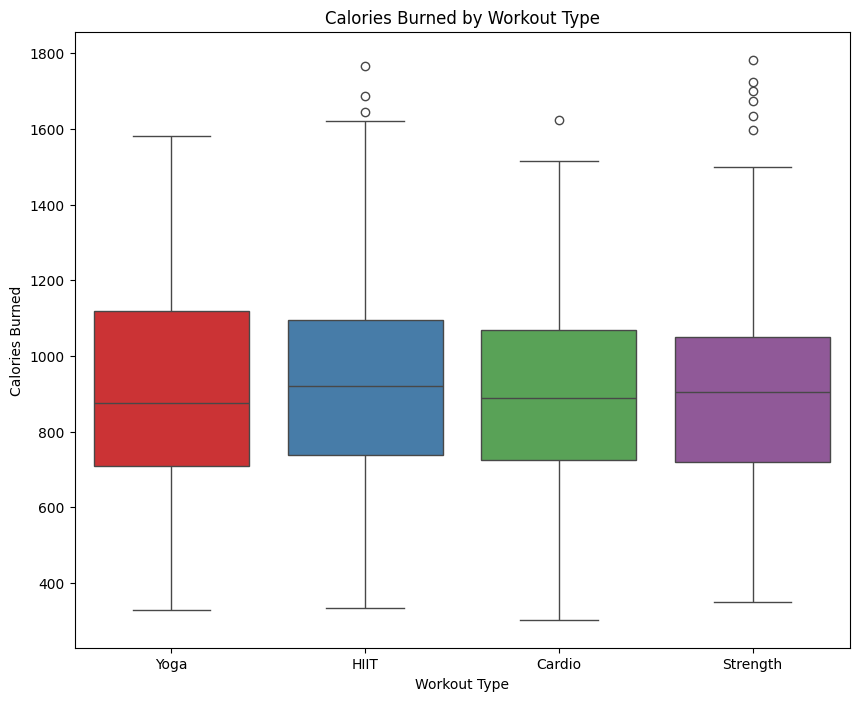

In [18]:
plt.figure(figsize=(10, 8))
sns.boxplot(data=df, x='Workout_Type', y='Calories_Burned', palette='Set1')
plt.title('Calories Burned by Workout Type')
plt.xlabel('Workout Type')
plt.ylabel('Calories Burned')
plt.show()

* HIIT and Strenght has slightly higher calorie expenditure compared to others.

* Calories burned are relatively consistent across other workout types, with no major differences in median values.

* While the median calories burned for Yoga is lower than other workout types, the broader range suggests that certain Yoga practices can rival or exceed calorie expenditure in other workouts.

* All workout types have a few outliers, particularly at the higher calorie-burning range. This might be due to individuals performing workouts with much higher intensity or duration than average.

For users aiming for high-calorie burn, all workout types have potential, but intensity and duration likely play a key role.

**4. Experience level:**

/tmp/ipython-input-19-57718746.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Experience_Level', y='Calories_Burned', data=df, palette='muted')


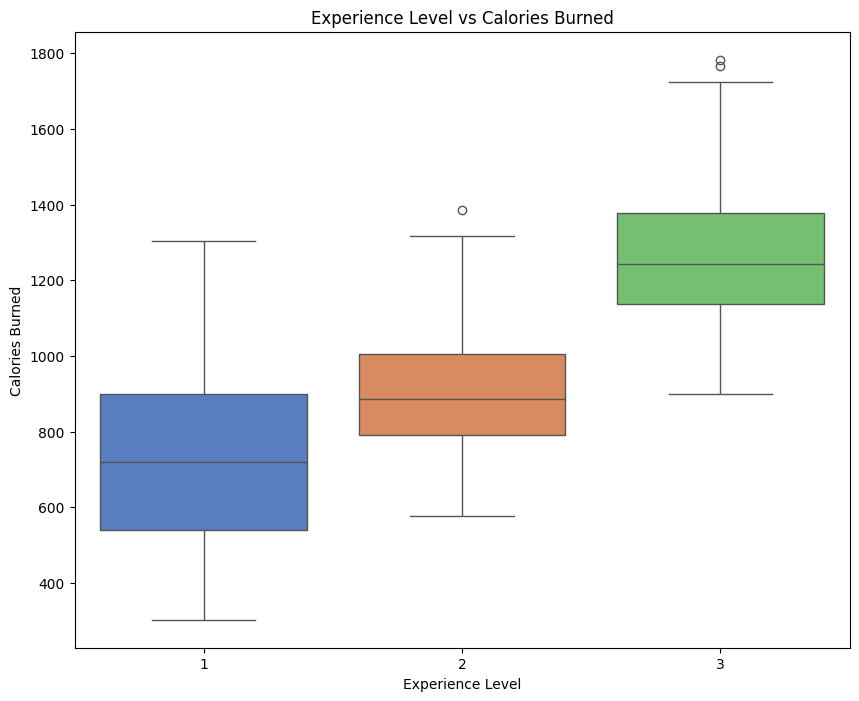

In [19]:
plt.figure(figsize=(10, 8))
sns.boxplot(x='Experience_Level', y='Calories_Burned', data=df, palette='muted')
plt.title('Experience Level vs Calories Burned')
plt.xlabel('Experience Level')
plt.ylabel('Calories Burned')
plt.show()

* The box plot indicates that more experienced individuals, particularly those at Level 3, tend to burn significantly more calories on average compared to Levels 1 and 2. This difference may stem from higher workout intensity, improved efficiency, or greater physical capacity developed through consistent training.

* While Level 1 individuals show a wider range of variability and lower median calorie burn, Level 2 participants display moderate improvement with fewer outliers. Level 3 stands out with a consistently higher calorie burn and a narrower spread, suggesting greater control and effectiveness in workouts.

**5. BMI:**


To gain deeper insights into how various factors, such as BMI, workout intensity, session duration, and weight, affect workout efficiency and calorie burn, we have enhanced our dataset by adding new variables. These include:

* BMI categories to classify individuals by body mass index (Underweight, Normal, Overweight, and Obese)

* The Intensity Score assesses workout intensity using heart rate and session duration. It combines perceived exertion (how hard the exercise feels to an individual), with more objective measures. A higher intensity score signifies a greater physical challenge, indicating a more demanding workout session.


* Efficiency Score measures how effectively calories are burned per session duration and weight. It divides calories burned by the product of session length and body weight, with higher values indicating more efficient calorie burn.

In [20]:
# Create BMI Categories
df['BMI_Category'] = pd.cut(df['BMI'],
                           bins=[0, 18.5, 24.9, 29.9, 100],
                           labels=['Underweight', 'Normal', 'Overweight', 'Obese'])
df['BMI_Category'].head()

,BMI_Category
0,Obese
1,Obese
2,Normal
3,Underweight
4,Underweight


In [21]:
# Create Intensity Score
df['Intensity_Score'] = (df['Avg_BPM'] / df['Resting_BPM']) * \
                       (df['Session_Duration (hours)'] / df['Session_Duration (hours)'].mean())
df['Intensity_Score'].head()

,Intensity_Score
0,3.519647
1,2.367229
2,1.995965
3,1.375219
4,1.183565


In [22]:
# Create Efficiency Score
df['Efficiency_Score'] = df['Calories_Burned'] / (df['Session_Duration (hours)'] * df['Weight (kg)'])
df['Efficiency_Score'].head()

,Efficiency_Score
0,8.798676
1,9.068502
2,8.956093
3,16.949153
4,18.844902


/tmp/ipython-input-23-831686507.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='BMI_Category', y='Calories_Burned',  data=df, palette='Set1')


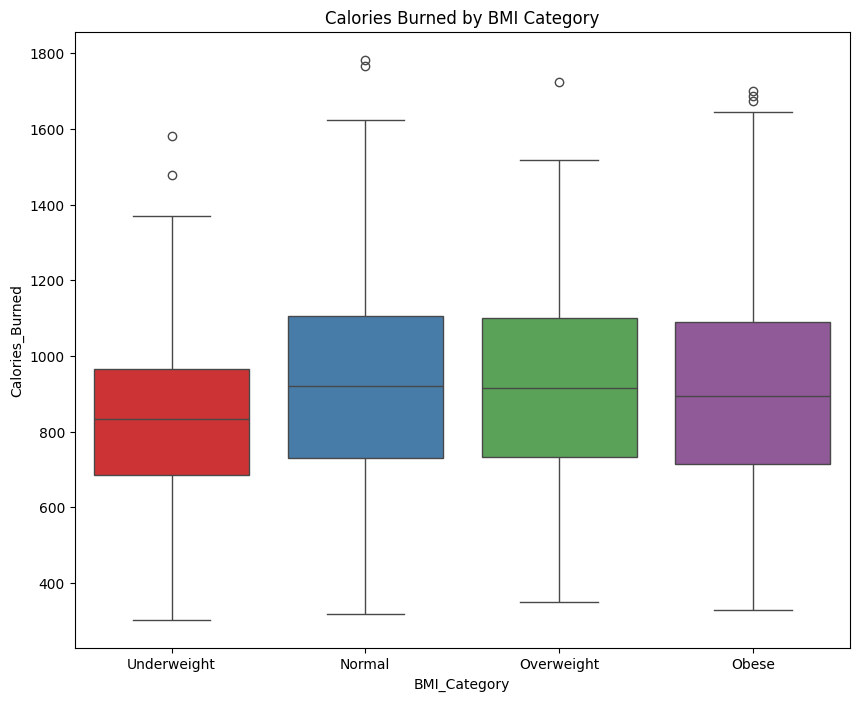

In [23]:
plt.figure(figsize=(10, 8))
sns.boxplot(x='BMI_Category', y='Calories_Burned',  data=df, palette='Set1')
plt.title('Calories Burned by BMI Category')
plt.show()

* Calorie expenditure appears relatively consistent across BMI categories, with the Normal and Overweight groups showing slightly higher median values compared to others.

* All BMI categories exhibit a few outliers, particularly at the higher calorie expenditure levels. These outliers likely represent individuals engaging in exceptionally intense or prolonged workouts.


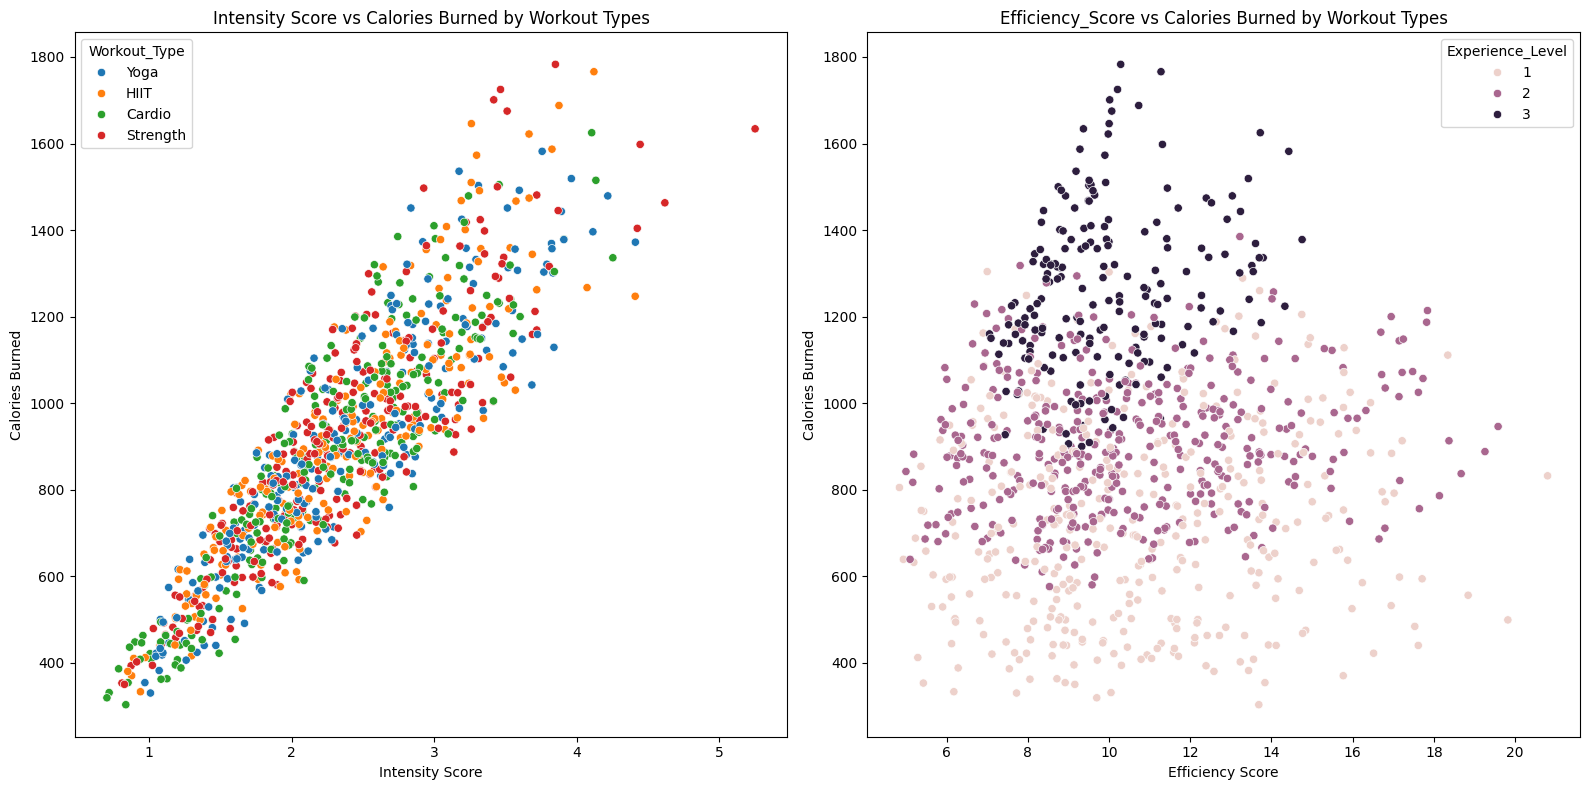

In [24]:
# Create subplots with 1 row and 2 columns
fig, axes = plt.subplots(1, 2, figsize=(16, 8))

# Plot Intensity Score vs Calories Burned by Workout types
sns.scatterplot(ax=axes[0], x='Intensity_Score', y = 'Calories_Burned', hue='Workout_Type', data=df)
axes[0].set_title('Intensity Score vs Calories Burned by Workout Types')
axes[0].set_xlabel('Intensity Score')
axes[0].set_ylabel('Calories Burned')

# Plot Efficiency Score vs Calories Burned by Workout Types
sns.scatterplot(ax=axes[1], x='Efficiency_Score', y = 'Calories_Burned', hue='Experience_Level', data=df)
axes[1].set_title('Efficiency_Score vs Calories Burned by Workout Types')
axes[1].set_xlabel('Efficiency Score')
axes[1].set_ylabel('Calories Burned')

plt.tight_layout()
plt.show()

**Intensity Score vs Calories Burned by Workout Types:**

The Intensity Score reflects how physically challenging a session is, considering heart rate and session duration, combined with perceived exertion.

* Yoga tends to stay in the lower intensity range, which is consistent with its typically less physically demanding nature. Even at higher Intensity Scores, Yoga burns relatively fewer calories compared to other workout types.

* HIIT indicates the highest calorie burn per given intensity score, suggesting that short bursts of high-energy exercises are highly effective for calorie burning.

* Cardio spreads across moderate Intensity Scores and Calories Burned, suggesting versatility in intensity and energy output.

* Strength leads to high calorie burns even at moderate Intensity Scores, likely due to the high physical exertion required to lift weights and build muscle.

**Overall:**

* HIIT appears to be the most efficient for those aiming to maximize calorie burn for a given level of intensity.

* Strength workouts are highly effective for burning calories without necessarily requiring very high-intensity levels.


**Efficiency Score vs Calories Burned by Experience Level**


Efficiency Score reflects how "efficient" a workout is in terms of calorie expenditure relative to the effort invested.A higher Efficiency Score signifies better calorie-burning efficiency per unit of weight and time.

* Beginners generally clusters in lower Efficiency Scores and Calories Burned, reflecting that they may need longer sessions or more practice to burn calories effectively.

* Intermediate spreads across a wider range, showing gradual improvement in both Efficiency and Calorie Burn as they refine their techniques and adapt to workouts.

* Advanced shows the highest Efficiency Scores and Calories Burned, demonstrating that experience and technique play a significant role in maximizing energy output during workouts.

**Overall**

* Beginners might be less efficient due to suboptimal technique or lower intensity, which could be addressed with guidance or training programs. They  should focus on improving their efficiency by incorporating workouts that promote better movement patterns and cardiovascular improvements (e.g., HIIT or Cardio at manageable intensities).

* Advanced individuals may utilize optimized movements, higher work rates, and improved cardiovascular fitness, leading to better results.

**Interpreting the Two Metrics Together**

* HIIT delivers the best combination of intensity and efficiency, making it highly effective for calorie burning.

* Strength workouts stand out for achieving high calorie burns with moderate intensity.

* Yoga and Cardio focus on consistent but less intense calorie output, ideal for varied fitness levels.  

# **III. SUMMARY**

**Overall Insights on Workout Preferences and Effectiveness**

Workout Type and Calorie Burn for Experience Levels:

* Beginners and Older Members: Start with Yoga or light Cardio, which provides a moderate calorie burn of 800-1000 calories, offering a gentle introduction to fitness.

* Intermediate to Advanced Levels: Progress to HIIT and Strength Training, where calorie burns can reach 1400-1600+ calories, ideal for younger individuals and experienced gym-goers looking for a more intense workout challenge.

Demographic Trends:

* Younger Members (18-25) prefer high-intensity workouts like HIIT and Cardio for efficiency and engagement while, older Members (41+): Favor Yoga and light Cardio for flexibility and maintenance.

* Males lean toward Strength Training for muscle gain and intensity while females prefer Cardio focusing on balanced, steady workouts.

Overall, preferences and calorie burn efficiency are strongly influenced by age, gender, and experience, with younger males prioritizing intensity and older members seeking balance and low impact.

# **IV. MODELING**

In this part, we will prepare the data through cleaning and creating features to improve the model analysis.

**1. Data cleaning:**

In the data cleaning process, we will focus on removing outliers, as there are no missing values to address.

 We use interquartile method to remove outliers from dataset.
 An interquartile formula: IQR = Q3 - Q1

In [25]:
for i in outlier:
  #Caculating IQR
  IQR = df[i].quantile(0.75) - df[i].quantile(0.25)
  #Calculating upper bound
  Upper = df[i].quantile(0.75) + 1.5*IQR
  #Calculating lower bound
  Lower = df[i].quantile(0.25) - 1.5*IQR
  print(i, ': IQR', IQR, 'Upper', Upper, 'Lower', Lower)

Weight (kg) : IQR 27.9 Upper 127.85 Lower 16.250000000000007
Calories_Burned : IQR 356.0 Upper 1610.0 Lower 186.0
BMI : IQR 8.45 Upper 41.235 Lower 7.4350000000000005


Let's check the statistics of these variable

In [26]:
df[outlier].describe()

,Weight (kg),Calories_Burned,BMI
count,973.000000,973.000000,973.000000
mean,73.854676,905.422405,24.912127
std,21.207500,272.641516,6.660879
min,40.000000,303.000000,12.320000
25%,58.100000,720.000000,20.110000
50%,70.000000,893.000000,24.160000
75%,86.000000,1076.000000,28.560000
max,129.900000,1783.000000,49.840000


As we can see from the table:
*   Weight: The range is from 40 to 129.9. The lower bound is 16.25 is invalid, therfore any value above the upper bound of 127.85 will be classified as an outlier.
*   Calories Burned: Values exceeding 1610 are identified as outliers.
*   BMI: Any value greater than 41.235 is considered an outlier.




In [27]:
df = df[~((df ['Weight (kg)'] > 127.85) |(df['Calories_Burned'] > 1610) | (df['BMI'] > 41.235))]
df.describe()

,Age,Weight (kg),Height (m),Max_BPM,Avg_BPM,Resting_BPM,Session_Duration (hours),Calories_Burned,Fat_Percentage,Water_Intake (liters),Workout_Frequency (days/week),Experience_Level,BMI,Intensity_Score,Efficiency_Score
count,932.000000,932.000000,932.000000,932.000000,932.000000,932.000000,932.000000,932.000000,932.000000,932.000000,932.000000,932.000000,932.000000,932.000000,932.000000
mean,38.805794,72.118240,1.723337,179.920601,143.452790,62.182403,1.253798,898.076180,25.136373,2.612017,3.314378,1.803648,24.273938,2.334500,10.586439
std,12.120140,19.581836,0.128488,11.513226,14.301605,7.361393,0.340060,262.988423,6.225982,0.600470,0.913491,0.739457,5.837905,0.722936,2.823911
min,18.000000,40.000000,1.500000,160.000000,120.000000,50.000000,0.500000,303.000000,10.000000,1.500000,2.000000,1.000000,12.320000,0.704712,4.997626
25%,28.000000,57.775000,1.620000,170.000000,131.000000,56.000000,1.040000,719.750000,21.300000,2.100000,3.000000,1.000000,19.902500,1.833856,8.575943
50%,40.000000,68.700000,1.715000,180.000000,143.000000,62.000000,1.260000,887.500000,26.400000,2.600000,3.000000,2.000000,23.880000,2.315093,10.014945
75%,50.000000,83.925000,1.800000,190.000000,156.000000,68.000000,1.450000,1071.250000,29.400000,3.100000,4.000000,2.000000,27.945000,2.812020,12.395468
max,59.000000,127.500000,2.000000,199.000000,169.000000,74.000000,1.990000,1598.000000,35.000000,3.700000,5.000000,3.000000,41.030000,4.619831,20.802080


In [35]:
numerical = df.select_dtypes(include=[np.number]).columns.tolist()

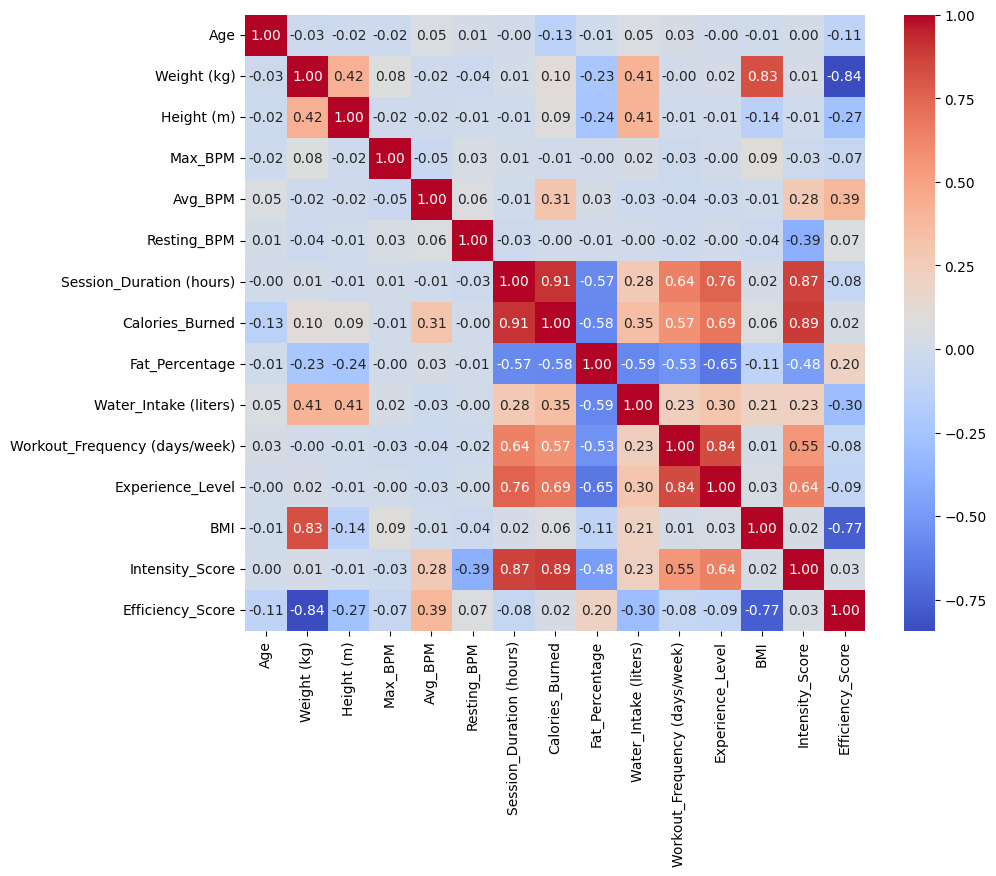

In [37]:
plt.figure(figsize=(10, 8))
sns.heatmap(df[numerical].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.show()

**2.  Train model**

In this part, we will train our model using different ML algorithms with a performance comparison for predicting Calories_Burned.


*   Linear Regression

*   Random Forest Regressor

*   Gradient Boosting Regressor

Split data into training and test set

In [47]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score

#Define features and target
target = 'Calories_Burned'
features = ['Age', 'Gender', 'Weight (kg)', 'Height (m)', 'Max_BPM', 'Avg_BPM', 'Resting_BPM',
            'Session_Duration (hours)', 'Workout_Type', 'Fat_Percentage', 'Water_Intake (liters)',
            'Workout_Frequency (days/week)', 'Experience_Level', 'BMI']

X = df[features]
y = df[target]


#Split into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Process pipeline before modeling

In [48]:
#Identify categorical and numerical features
categorical_features = ['Gender', 'Workout_Type']
numerical_features = [col for col in features if col not in categorical_features]

# 5. Preprocessing pipelines for both types
categorical_transformer = OneHotEncoder(drop='first', handle_unknown='ignore')
numerical_transformer = StandardScaler()

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ])

In [49]:
#Models
models = {
    'Linear Regression': LinearRegression(),
    'Random Forest': RandomForestRegressor(n_estimators=100, random_state=42),
    'Gradient Boosting': GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
}

# 7. Train, predict and evaluate models
results = []

for name, model in models.items():
    pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('regressor', model)
    ])

    pipeline.fit(X_train, y_train)
    y_pred = pipeline.predict(X_test)

    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)

    results.append({
        'Model': name,
        'RMSE': rmse,
        'R² Score': r2
    })

# 8. Show comparison results
results_df = pd.DataFrame(results)
print(results_df)

               Model       RMSE  R² Score
0  Linear Regression  38.629923  0.980135
1      Random Forest  42.503463  0.975951
2  Gradient Boosting  19.828567  0.994766


* All three models perform very well at predicting Calories\_Burned, with R² scores above 0.97, which means they explain over 97% of the variance in the target variable.

* **Gradient Boosting** is clearly the best model:

  * It has the **lowest RMSE (19.83)**, indicating its predictions are closest on average to the true values.

  * It has the **highest R² (0.995)**, meaning it fits the data extremely well.

* **Linear Regression**, despite its simplicity, also performs strongly with an R² of 0.98. This suggests the relationship between features and calories burned has a substantial linear component.

* **Random Forest** performs slightly worse than Linear Regression and Gradient Boosting in this case, which can happen depending on hyperparameters and data characteristics.